In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 

In [3]:
colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']
prima_df = pd.read_csv("prima-indians-diabetes.data",names=colnames)

In [4]:
X=prima_df[['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age']]
Y=prima_df['outcome']

In [78]:
sc=StandardScaler()
sc.fit_transform(X)

/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [79]:
knn_model=KNeighborsClassifier(weights = 'uniform',metric='euclidean')

In [80]:
#Perform Grid Search Method to find the optimal max_depth size
from sklearn.model_selection import GridSearchCV
parameter={'n_neighbors':np.arange(1,20)}
GS=GridSearchCV(knn_model,parameter,cv=5,scoring='recall')
GS.fit(X,Y)


/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [81]:
GS.best_params_

{'n_neighbors': 3}

In [82]:
base_knn3=KNeighborsClassifier(n_neighbors=3,weights = 'distance',metric='euclidean')
base_knn5=KNeighborsClassifier(n_neighbors=5,weights = 'distance',metric='euclidean')

In [83]:
from sklearn.ensemble import BaggingClassifier
#Default base estimator is Decision Tree (CART)


In [84]:
bgcl_knn3 = BaggingClassifier(base_estimator=base_knn3,n_estimators=10,random_state=2)
bgcl_knn5 = BaggingClassifier(base_estimator=base_knn5,n_estimators=10,random_state=2)

In [85]:
base_nb=GaussianNB()
bgcl_nb = BaggingClassifier(base_estimator=base_nb,n_estimators=10,random_state=2)

In [95]:
base_LR=LogisticRegression()
bgcl_LR = BaggingClassifier(base_estimator=base_LR,n_estimators=20,random_state=2)

In [104]:
bgcl_dt=BaggingClassifier(n_estimators=31,random_state=2)

In [108]:
rf_model=RandomForestClassifier(n_estimators=31)

In [109]:
models = []
models.append(('Base_Knn_3', base_knn3))
models.append(('Base_Knn_5', base_knn5))
models.append(('Bagged_knn_3',bgcl_knn3))
models.append(('Bagged_knn_5',bgcl_knn5))
models.append(('Base_NB',base_nb))
models.append(('Bagged_NB',bgcl_nb))
models.append(('LR',base_LR))
models.append(('Bagged_LR',bgcl_LR))
models.append(('Bagged_DT',bgcl_dt))
models.append(('RF',rf_model))






Base_Knn_3: 0.453374 (0.003572)
Base_Knn_5: 0.469869 (0.001967)
Bagged_knn_3: 0.457145 (0.001809)
Bagged_knn_5: 0.443540 (0.001569)
Base_NB: 0.410408 (0.001318)
Bagged_NB: 0.417825 (0.000965)
LR: 0.473394 (0.000123)


/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver 

Bagged_LR: 0.465977 (0.000234)
Bagged_DT: 0.371948 (0.003423)
RF: 0.415408 (0.000420)


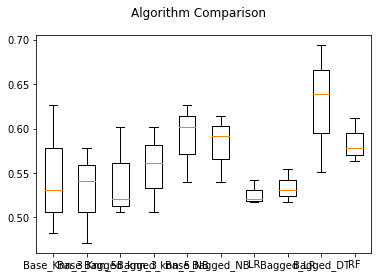

In [110]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=3,random_state=2)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, 
                                                 scoring='recall')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(1-cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()